In [1]:
import numpy as np
from scipy import interpolate
from matplotlib.tri import Triangulation
import matplotlib.pyplot as plt
# These are just cosmetics
plt.style.use('seaborn-white')
#plt.style.use('ggplot')
plt.rc('font', size=16) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=16) #fontsize of the x and y labels
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.rc('legend', fontsize=14) #fontsize of the legend

In [2]:
import V2RhoT_gibbs_lib as lib

In [3]:
DMM_no_atten = np.loadtxt('./databases/DMM_HP',comments='#')
# correction using grain size = 10 mm and oscillatio period of 75 seconds.
# Attenuation model of Jackson and Faul 2010
# Function: lib.atten_correction (T (oC),P (Pascal),Vp (km/s),Vs (km/s),oscilation period (s), grain size (mm))
DMM_atten_corrected = np.copy(DMM_no_atten)
for i in range(len(DMM_atten_corrected)):
    DMM_atten_corrected[i,3],DMM_atten_corrected[i,4] = lib.atten_correction(DMM_atten_corrected[i,0],DMM_atten_corrected[i,1]*1e5,
                                                         DMM_atten_corrected[i,3],DMM_atten_corrected[i,4],75,10)

# correction for melts
# These are relations from lab experiments. More details in Afonso et al., 2016 III
# Function: lib.velocity_melt_correction_mantle (T (oC),P (GPa),VP (km/s),Vs (km/s)
DMM_atten_melt_corrected = np.copy(DMM_atten_corrected)
melt = np.zeros_like(DMM_atten_melt_corrected[:,0])
for i in range(len(DMM_atten_melt_corrected)):
    DMM_atten_melt_corrected[i,3],DMM_atten_melt_corrected[i,4],melt[i] = lib.velocity_melt_correction_mantle(DMM_atten_melt_corrected[i,0]-273.15,
                                                                                             DMM_atten_melt_corrected[i,1]/1e4,
                                                             DMM_atten_melt_corrected[i,3],DMM_atten_melt_corrected[i,4])
# append melt to the table 
DMM_atten_melt_corrected[:,5]=melt[:]
Composition_1 =DMM_atten_melt_corrected

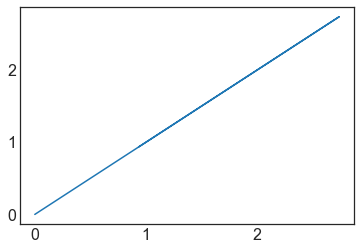

In [4]:
plt.plot(melt,DMM_atten_melt_corrected[:,5])

In [5]:
np.shape(temp)

NameError: name 'temp' is not defined

In [5]:
### lithostatic pressure 
def lithostatic_pressure(depth,density):
    Pressure_lith = np.zeros_like(depth)
    # Check is the first index is at zero depth or not
    # If it is not then pressures is set equal rho*g*h
    # else is it set to 0
    if depth[0] != 0:
        Pressure_lith[0] = density[0] * depth[0]* 9.8 * 1e3 * 1e-5
    else:
        #thickness = (depth[1]-depth[0]) #*1e3
        Pressure_lith[0] = 0
    # Now looping through depths
    for j in range(len(depth)-2):
        thickness = (depth[j+2] - depth [j+1]) *1e3
        Pressure_lith[j+1]=Pressure_lith[j] + thickness*density[j+1] *9.8*1e-5
        
    # fixing last index
    Pressure_lith[-1] = Pressure_lith[-2] + (depth[-1] - depth [-2])*1e3 * density[-2]*9.8*1e-5 
    #print(depth[:],density[:],Pressure_lith[:])

    p_func = interpolate.interp1d(depth,Pressure_lith)
    return p_func


In [6]:
### lithostatic pressure 
def lithostatic_pressure_depth(depth,density):
    Pressure = 0
    # Check is the first index is at zero depth or not
    # If it is not then pressures is set equal rho*g*h
    # else is it set to 0
    if np.size(depth) > 1:
        Pressure_lith = np.zeros_like(depth)
        if depth[0] != 0:
            Pressure_lith[0] = density[0] * depth[0]* 9.8 * 1e3 * 1e-5
        else:
            #thickness = (depth[1]-depth[0]) #*1e3
            Pressure_lith[0] = 0
            # Now looping through depths
        for j in range(len(depth)-2):
            thickness = (depth[j+2] - depth [j+1]) *1e3
            Pressure_lith[j+1]=Pressure_lith[j] + thickness*density[j+1] *9.8*1e-5
        Pressure = Pressure_lith[-1]
    elif depth !=0:
        Pressure = (depth-0)*density* 9.8 * 1e3 * 1e-5
    else:
        Pressure = 0
    #print(Pressure)
    return Pressure

In [21]:
tomo_NA_stack=np.loadtxt('./data_tomo/NA_age_vel_stack.dat',comments='#')
# Just formating the data required
data=tomo_NA_stack[:,0];
data=np.column_stack((data,tomo_NA_stack[:,0]))
data=np.column_stack((data,tomo_NA_stack[:,1]))
data=np.column_stack((data,tomo_NA_stack[:,2]))
data[:,1]=0
X = np.unique(data[:,0])
Y = np.unique(data[:,1])
Z = np.unique(data[:,2])
nx,ny,nz = np.meshgrid(X,Y,Z)
V= np.zeros_like(nz)
Composition = np.zeros_like(nz)+1 

In [20]:
m,n,p = np.shape(nz)
for i in range(m):
    for j in range(n):
        for k in range(p):
            ind = np.where( (data[:,0] == nx[i][j][k]) & (data[:,1] == ny[i][j][k]) & (data[:,2] == nz[i][j][k]))
            #print(nx[i][j][k],ny[i][j][k],nz[i][j][k])
            try:
                V[i][j][k] = data[ind[0],3]
            except:
                print('Data is not a 3D volume!!')

Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not 

Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not 

Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not 

Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not 

Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not 

Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not 

Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not 

Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not 

Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not a 3D volume!!
Data is not 

In [12]:
def vel_to_temp_P_loop(nx,ny,nz,Vs,Table):
    Temperature_out = np.zeros_like(nx)
    Density_out     = np.zeros_like(nx) #+3300
    diff_Vs         = np.zeros_like(nx)
    P_out           = np.zeros_like(nx)
    melt_out        = np.zeros_like(nx)
    Vp_out          = np.zeros_like(nx)#np.zeros_like(tomo[:,1])
    Vs_out          = np.zeros_like(nx)#np.zeros_like(tomo[:,1])
    m,n,p=np.shape(nx)
    # looping over all the geospatial nodes
    for i in range(m):
        for j in range(n):
            #P_func=lithostatic_pressure(nz[i][j][:],Density_out[i][j][:])
            # Starting with ak135 pressure profile
            P_func=lib.pressure_inter
            # setting positive difference to set the while loop
            diff = 10
            p_counter  = 0
            while diff > 0:
                #print(f'{p_counter} Pressure counter {threshhold}.')
                p_counter = p_counter+1
                # loop over all depths to get the density and temperature
                for k in range(p):
                    P  = P_func(nz[i][j][k])
                    Vs_in = Vs[i][j][k]
                    P_table,temp,dens,vp,vs,melt=lib.lookup_vs_P_accurate_prop(Vs_in,P.tolist(),Table)
                    P_out[i][j][k] = P_table 
                    Temperature_out[i][j][k]=temp
                    Density_out[i][j][k]=dens
                    Vs_out[i][j][k]=vs
                    Vp_out[i][j][k]=vp
                    melt_out[i][j][k]=melt
                # calulcating new pressure profile
                P_func_new=lithostatic_pressure(nz[i][j][:],Density_out[i][j][:])
                # RMS difference between initial and updated pressure profile
                diff = np.sqrt(((P_func_new(nz[i][j][:]) - P_func(nz[i][j][:])) ** 2).mean())
                print('Pressure counter',p_counter)
                print(f'{p_counter} Pressure updated {diff}.')
                print(diff)
                # update the pressure profile
                P_func = P_func_new
    return P_out,Temperature_out,Density_out,Vp_out,Vs_out,melt_out 

def vel_to_temp(nx,ny,nz,Vs,Table):
    Temperature_out = np.zeros_like(nx)
    Density_out     = np.zeros_like(nx)#+3300
    diff_Vs         = np.zeros_like(nx)
    P_out           = np.zeros_like(nx)
    melt_out        = np.zeros_like(nx)
    Vp_out          = np.zeros_like(nx)#np.zeros_like(tomo[:,1])
    Vs_out          = np.zeros_like(nx)#np.zeros_like(tomo[:,1])
    m,n,p=np.shape(nx)
    # looping over all the geospatial nodes
    for i in range(m):
        for j in range(n):
            P_func=lib.pressure_inter
            for k in range(p):
                P  = P_func(nz[i][j][k])
                Vs_in = Vs[i][j][k]
                P_table,temp,dens,vp,vs,melt=lib.lookup_vs_P_accurate_prop(Vs_in,P.tolist(),Table)
                P_out[i][j][k] = P_table 
                Temperature_out[i][j][k]=temp
                Density_out[i][j][k]=dens
                Vs_out[i][j][k]=vs
                Vp_out[i][j][k]=vp
                melt_out[i][j][k]=melt
    return P_out,Temperature_out,Density_out,Vp_out,Vs_out,melt_out 

In [ ]:
def vel_to_temp_P_loop(nx,ny,nz,Vs,Table):
    Temperature_out = np.zeros_like(nx)
    Density_out     = np.zeros_like(nx)
    diff_Vs         = np.zeros_like(nx)
    P_out           = lib.pressure_inter(nz) #np.zeros_like(nx)
    melt_out        = np.zeros_like(nx)
    Vp_out          = np.zeros_like(nx)#np.zeros_like(tomo[:,1])
    Vs_out          = np.zeros_like(nx)#np.zeros_like(tomo[:,1])
    m,n,p=np.shape(nx)
    # looping over all the geospatial nodes
    for i in range(m):
        for j in range(n):
            P_func=lithostatic_pressure(nz[i][j][:],Density_out[i][j][:])
            # Starting with ak135 pressure profile
            #P_func=lib.pressure_inter
            # setting positive difference to set the while loop
                #print(f'{p_counter} Pressure counter {threshhold}.')
                # loop over all depths to get the density and temperature
                #P_new=np.zeros_like(nz[i][j][:])
            for k in range(p):
                    Vs_in = Vs[i][j][k]
                    #  = P_func(nz[i][j][k])
                    diff = 100
                    p_counter  = 0
                    #P =lib.pressure_inter(nz[i][j][k])
                    while  diff > 0:
                        #P =  (nz[i][j][k]-0)*Density_out[i][j][k]* 9.8 * 1e3 * 1e-5
                        if k==0:
                            P =   lithostatic_pressure_depth(nz[i][j][0],Density_out[i][j][0])
                        else:
                            P =   lithostatic_pressure_depth(nz[i][j][0:k],Density_out[i][j][0:k])
                        
                        P_table,temp,dens,vp,vs,melt=lib.lookup_vs_P_accurate_prop(Vs_in,P,Table)
                        Density_out[i][j][k]=dens
                        if k==0:
                            P_new =   lithostatic_pressure_depth(nz[i][j][0],Density_out[i][j][0])
                        else:
                            P_new =   lithostatic_pressure_depth(nz[i][j][0:k],Density_out[i][j][0:k])
                        #P_new=P_table
                        
                        #if k==0:
                        #    P_new =   (nz[i][j][k]-0)*Density_out[i][j][k]* 9.8 * 1e3 * 1e-5 #lithostatic_pressure_depth(nz[i][j][0],Density_out[i][j][0])
                        #else:
                        #    P_new =   (nz[i][j][k]-0)*Density_out[i][j][k]* 9.8 * 1e3 * 1e-5 #lithostatic_pressure_depth(nz[i][j][0:k],Density_out[i][j][0:k])
                        #P_new=P_table
                        diff = abs(P_new-P)
                        p_counter = p_counter+1
                        print('Depth is',nz[i][j][k])
                        print(f'{p_counter} Pressure updated {diff}.')
                        P = P_new
                        P_out[i][j][k] = P 
                    Temperature_out[i][j][k]=temp
                    Vs_out[i][j][k]=vs
                    Vp_out[i][j][k]=vp
                    melt_out[i][j][k]=melt
                # calulcating new pressure profile
                #P_func_new=lithostatic_pressure(nz[i][j][:],Density_out[i][j][:])
                #P_func_new = interpolate.interp1d(nz[i][j][:],P_new[:])
                # RMS difference between initial and updated pressure profile
                #diff = np.sqrt(((P_func_new(nz[i][j][:]) - P_func(nz[i][j][:])) ** 2).mean())
                #print(f'{p_counter} Pressure updated {diff}.')
                # update the pressure profile
                #P_func = P_func_new
    return P_out,Temperature_out,Density_out,Vp_out,Vs_out,melt_out 


In [18]:
P_P_loop,T_P_loop,D_P_loop,Vp_P_loop,Vs_P_loop,melt_P_loop=vel_to_temp_P_loop(nx,ny,nz,V,Composition_1)


Pressure counter 1
1 Pressure updated 1959.565653349907.
1959.565653349907
Pressure counter 2
2 Pressure updated 95.99526017517351.
95.99526017517351
Pressure counter 3
3 Pressure updated 3.9277045882507835.
3.9277045882507835
Pressure counter 4
4 Pressure updated 0.4694835473696602.
0.4694835473696602
Pressure counter 5
5 Pressure updated 0.0.
0.0
Pressure counter 1
1 Pressure updated 1940.9655986326054.
1940.9655986326054
Pressure counter 2
2 Pressure updated 95.43357926669529.
95.43357926669529
Pressure counter 3
3 Pressure updated 4.0336172688589045.
4.0336172688589045
Pressure counter 4
4 Pressure updated 0.0.
0.0
Pressure counter 1
1 Pressure updated 1908.9708088794948.
1908.9708088794948
Pressure counter 2
2 Pressure updated 91.2337609685515.
91.2337609685515
Pressure counter 3
3 Pressure updated 3.937343035685562.
3.937343035685562
Pressure counter 4
4 Pressure updated 0.0.
0.0
Pressure counter 1
1 Pressure updated 1891.2888403791449.
1891.2888403791449
Pressure counter 2
2 Pre

Pressure counter 3
3 Pressure updated 1.3413524016368694.
1.3413524016368694
Pressure counter 4
4 Pressure updated 0.0.
0.0
Pressure counter 1
1 Pressure updated 1210.441680228536.
1210.441680228536
Pressure counter 2
2 Pressure updated 40.606567966951104.
40.606567966951104
Pressure counter 3
3 Pressure updated 0.5850895469869655.
0.5850895469869655
Pressure counter 4
4 Pressure updated 0.0.
0.0
Pressure counter 1
1 Pressure updated 1211.4765342248588.
1211.4765342248588
Pressure counter 2
2 Pressure updated 41.14085989676861.
41.14085989676861
Pressure counter 3
3 Pressure updated 0.5653674274220298.
0.5653674274220298
Pressure counter 4
4 Pressure updated 0.0.
0.0
Pressure counter 1
1 Pressure updated 1231.6143990564822.
1231.6143990564822
Pressure counter 2
2 Pressure updated 39.819134804753006.
39.819134804753006
Pressure counter 3
3 Pressure updated 1.5587621755036367.
1.5587621755036367
Pressure counter 4
4 Pressure updated 0.0.
0.0
Pressure counter 1
1 Pressure updated 1258.153

In [14]:
P,T,D,Vp,Vs,melt=vel_to_temp(nx,ny,nz,V,DMM_atten_melt_corrected)

Text(0.5, 1.0, 'P loop')

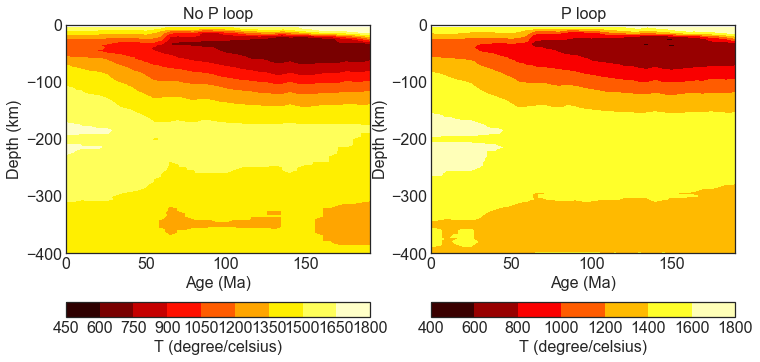

In [15]:
tri = Triangulation(nx.flatten(),-nz.flatten())
fig, ax = plt.subplots(1, 2,sharex=False, sharey=False,figsize=(12,6))
T_gibbs = ax[0].tricontourf(tri, T.flatten(),cmap='hot')#,levels=np.arange(200,1500,100))
T_gibbs_P = ax[1].tricontourf(tri, T_P_loop.flatten(),cmap='hot')#,levels=np.arange(200,1500,100))
for a in ax:
        #a.set_aspect('equal')
        a.set_ylim([-400,0])
        a.set_xlabel('Age (Ma)')
        a.set_ylabel('Depth (km)')
        a.set_title('')
fig.colorbar(T_gibbs, ax=ax[0], label='T (degree/celsius)', orientation='horizontal')
fig.colorbar(T_gibbs_P, ax=ax[1], label='T (degree/celsius)', orientation='horizontal')
ax[0].set_title('No P loop')
ax[1].set_title('P loop')

#fig.colorbar(m_t_out, ax=ax[2], label='Temperature (Celcius)', orientation='horizontal')
#fig.colorbar(m_dens_out, ax=ax[3], label='Density (g/cm3)', orientation='horizontal')
#fig.suptitle(title, fontsize=16)
#ax.set_ylim([-400,0])
#ax.set_xlabel('Distance (km)')
#ax.set_ylabel('Depth (km)')
#fig.colorbar(m_v_in_gibbs, ax=ax[0], label='Temperature (degree/celcius)', orientation='vertical')


Text(0.5, 1.0, 'P loop')

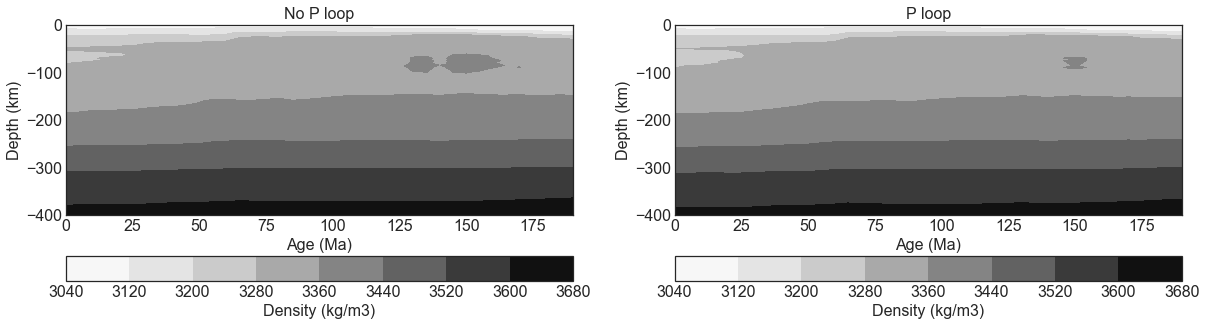

In [16]:
tri = Triangulation(nx.flatten(),-nz.flatten())
fig, ax = plt.subplots(1, 2,sharex=False, sharey=False,figsize=(20,5))
D_gibbs = ax[0].tricontourf(tri, D.flatten())
D_gibbs_P = ax[1].tricontourf(tri, D_P_loop.flatten())
for a in ax:
        #a.set_aspect('equal')
        a.set_ylim([-400,0])
        a.set_xlabel('Age (Ma)')
        a.set_ylabel('Depth (km)')
        a.set_title('')
fig.colorbar(D_gibbs, ax=ax[0], label='Density (kg/m3)', orientation='horizontal')
fig.colorbar(D_gibbs_P, ax=ax[1], label='Density (kg/m3)', orientation='horizontal')
ax[0].set_title('No P loop')
ax[1].set_title('P loop')

Text(0.5, 1.0, 'P loop')

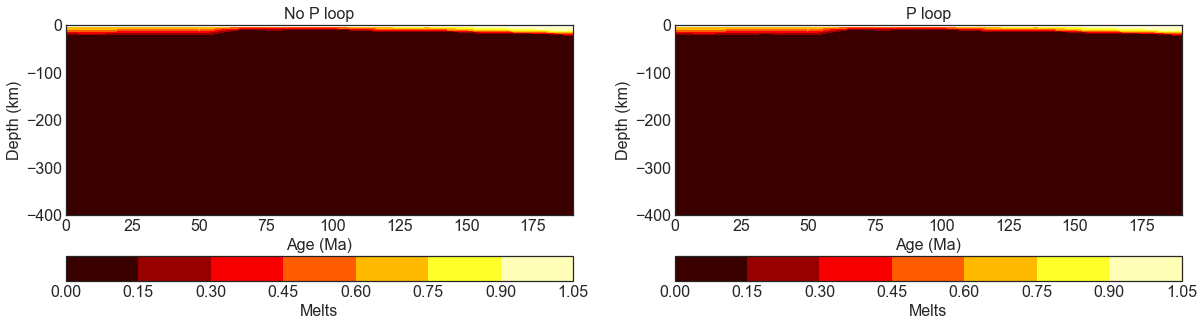

In [17]:
tri = Triangulation(nx.flatten(),-nz.flatten())
fig, ax = plt.subplots(1, 2,sharex=False, sharey=False,figsize=(20,5))
D_gibbs   = ax[0].tricontourf(tri, melt.flatten(),cmap='hot')#,levels=np.arange(0,2,0.2))
D_gibbs_P = ax[1].tricontourf(tri, melt_P_loop.flatten(),cmap='hot')#,levels=np.arange(0,2,0.2))
for a in ax:
        #a.set_aspect('equal')
        a.set_ylim([-400,0])
        a.set_xlabel('Age (Ma)')
        a.set_ylabel('Depth (km)')
        a.set_title('')
fig.colorbar(D_gibbs, ax=ax[0], label='Melts', orientation='horizontal')
fig.colorbar(D_gibbs_P, ax=ax[1], label='Melts', orientation='horizontal')
ax[0].set_title('No P loop')
ax[1].set_title('P loop')

Text(0.5, 1.0, 'P loop')

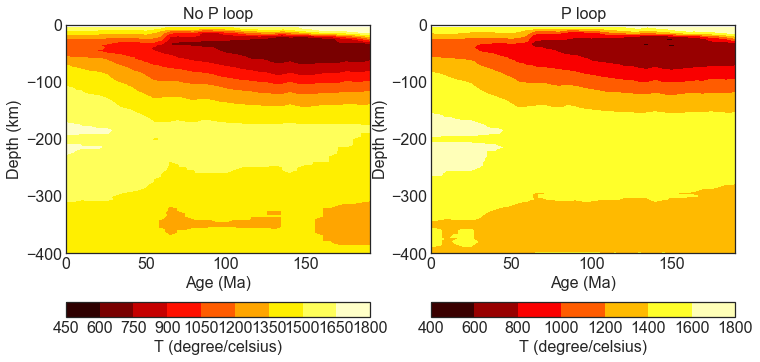

In [13]:
tri = Triangulation(nx.flatten(),-nz.flatten())
fig, ax = plt.subplots(1, 2,sharex=False, sharey=False,figsize=(12,6))
T_gibbs = ax[0].tricontourf(tri, T.flatten(),cmap='hot')#,levels=np.arange(200,1500,100))
T_gibbs_P = ax[1].tricontourf(tri, T_P_loop.flatten(),cmap='hot')#,levels=np.arange(200,1500,100))
for a in ax:
        #a.set_aspect('equal')
        a.set_ylim([-400,0])
        a.set_xlabel('Age (Ma)')
        a.set_ylabel('Depth (km)')
        a.set_title('')
fig.colorbar(T_gibbs, ax=ax[0], label='T (degree/celsius)', orientation='horizontal')
fig.colorbar(T_gibbs_P, ax=ax[1], label='T (degree/celsius)', orientation='horizontal')
ax[0].set_title('No P loop')
ax[1].set_title('P loop')

#fig.colorbar(m_t_out, ax=ax[2], label='Temperature (Celcius)', orientation='horizontal')
#fig.colorbar(m_dens_out, ax=ax[3], label='Density (g/cm3)', orientation='horizontal')
#fig.suptitle(title, fontsize=16)
#ax.set_ylim([-400,0])
#ax.set_xlabel('Distance (km)')
#ax.set_ylabel('Depth (km)')
#fig.colorbar(m_v_in_gibbs, ax=ax[0], label='Temperature (degree/celcius)', orientation='vertical')

Text(0.5, 1.0, 'P loop')

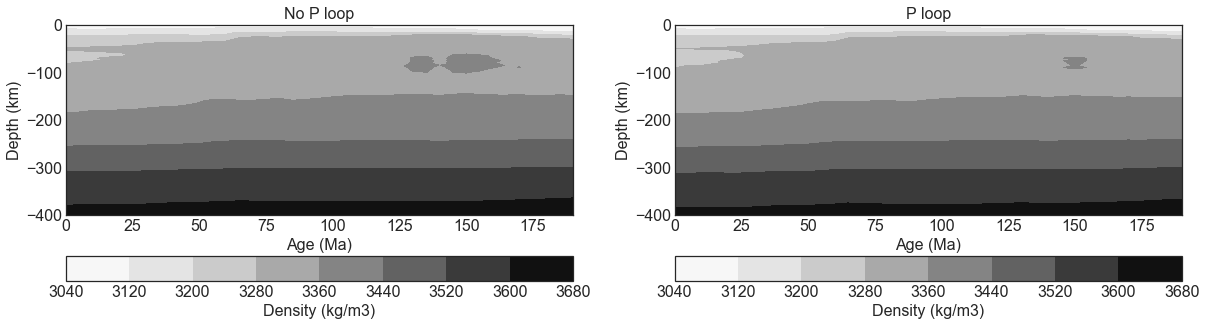

In [14]:
tri = Triangulation(nx.flatten(),-nz.flatten())
fig, ax = plt.subplots(1, 2,sharex=False, sharey=False,figsize=(20,5))
D_gibbs = ax[0].tricontourf(tri, D.flatten())
D_gibbs_P = ax[1].tricontourf(tri, D_P_loop.flatten())
for a in ax:
        #a.set_aspect('equal')
        a.set_ylim([-400,0])
        a.set_xlabel('Age (Ma)')
        a.set_ylabel('Depth (km)')
        a.set_title('')
fig.colorbar(D_gibbs, ax=ax[0], label='Density (kg/m3)', orientation='horizontal')
fig.colorbar(D_gibbs_P, ax=ax[1], label='Density (kg/m3)', orientation='horizontal')
ax[0].set_title('No P loop')
ax[1].set_title('P loop')

In [28]:
'''
tri = Triangulation(nx.flatten(),-nz.flatten())
fig, ax = plt.subplots(1, 2,sharex=False, sharey=False,figsize=(20,5))
D_gibbs   = ax[0].tricontourf(tri, melt.flatten(),cmap='hot')#,levels=np.arange(0,2,0.2))
D_gibbs_P = ax[1].tricontourf(tri, melt_P_loop.flatten(),cmap='hot')#,levels=np.arange(0,2,0.2))
for a in ax:
        #a.set_aspect('equal')
        a.set_ylim([-400,0])
        a.set_xlabel('Age (Ma)')
        a.set_ylabel('Depth (km)')
        a.set_title('')
fig.colorbar(D_gibbs, ax=ax[0], label='Melts', orientation='horizontal')
fig.colorbar(D_gibbs_P, ax=ax[1], label='Melts', orientation='horizontal')
ax[0].set_title('No P loop')
ax[1].set_title('P loop')
'''

"\ntri = Triangulation(nx.flatten(),-nz.flatten())\nfig, ax = plt.subplots(1, 2,sharex=False, sharey=False,figsize=(20,5))\nD_gibbs   = ax[0].tricontourf(tri, melt.flatten(),cmap='hot')#,levels=np.arange(0,2,0.2))\nD_gibbs_P = ax[1].tricontourf(tri, melt_P_loop.flatten(),cmap='hot')#,levels=np.arange(0,2,0.2))\nfor a in ax:\n        #a.set_aspect('equal')\n        a.set_ylim([-400,0])\n        a.set_xlabel('Age (Ma)')\n        a.set_ylabel('Depth (km)')\n        a.set_title('')\nfig.colorbar(D_gibbs, ax=ax[0], label='Melts', orientation='horizontal')\nfig.colorbar(D_gibbs_P, ax=ax[1], label='Melts', orientation='horizontal')\nax[0].set_title('No P loop')\nax[1].set_title('P loop')\n"

In [16]:
T_mantle = 1350 # oC
alpha    = 3e-5 # oC-1
cp       = 1250 # J/kg/oC 
g        = 9.8 #m/s2
dT_dZ    = ((T_mantle*alpha*g)/cp)*1e3 # oC/km
print('Adiabatic gradient (/km):',dT_dZ)
#T = T_mantle + Z*dT_dZ

Adiabatic gradient (/km): 0.31752


In [32]:
m,n,p=np.shape(nx)
Thermal_boundary = np.zeros((m,n))
for i in range(m):
    for j in range(n):
        T_mantle    = 1200 #T_P_loop[i][j][-1] #1600 # oC
        #T_mantle    = T_P_loop[i][j][-1] #1600 # oC
        #print(T_mantle)
        alpha       = 3e-5 # oC-1
        cp          = 1250 # J/kg/oC 
        g           = 9.8 #m/s2
        dT_dZ       = ((T_mantle*alpha*g)/cp)*1e3 # oC/km
        adiabat     = T_mantle + nz[i][j][:]*dT_dZ
        temperature = T_P_loop[i][j][:]
        dist        = np.array((adiabat-temperature)**2);
        index       = dist.argmin()
        Thermal_boundary[i][j]=nz[i][j][index]


Text(0.5, 0, 'Age (Ma)')

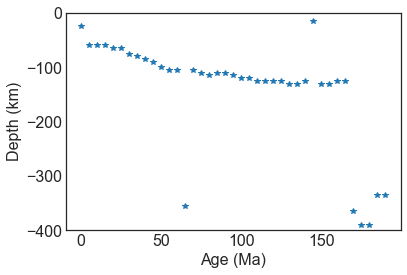

In [33]:
plt.plot(X,-Thermal_boundary.flatten(),'*')
plt.ylim([-400,0])
plt.ylabel('Depth (km)')
plt.xlabel('Age (Ma)')

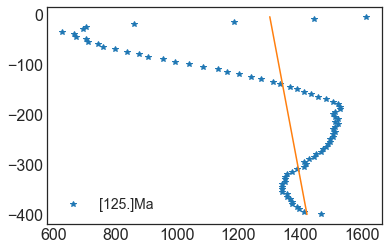

In [34]:
index=25
T_mantle    = 1300 # oC
#T_mantle    = T_P_loop[0][index][-1]
alpha       = 3e-5 # oC-1
cp          = 1250 # J/kg/oC 
g           = 9.8 #m/s2
dT_dZ       = ((T_mantle*alpha*g)/cp)*1e3 # oC/km
        
plt.plot(T[0][index][:],-nz[0][index][:],'*',label=str(np.unique(nx[0][index][:]))+'Ma')
plt.plot(T_mantle + nz[0][index][:]*dT_dZ,-nz[0][index][:])
#plt.plot(T_mantle + nz[0][index][:]*dT_dZ,-nz[0][index][:],'*')

#plt.ylim([-400,0])
plt.legend()

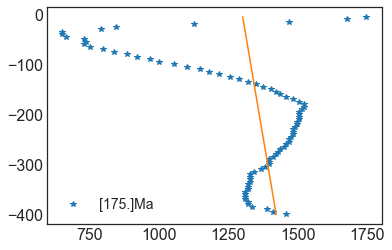

In [27]:
index=35
T_mantle    = 1300 # oC
#T_mantle    = T_P_loop[0][index][-1]
alpha       = 3e-5 # oC-1
cp          = 1250 # J/kg/oC 
g           = 9.8 #m/s2
dT_dZ       = ((T_mantle*alpha*g)/cp)*1e3 # oC/km
        
plt.plot(T[0][index][:],-nz[0][index][:],'*',label=str(np.unique(nx[0][index][:]))+'Ma')
plt.plot(T_mantle + nz[0][index][:]*dT_dZ,-nz[0][index][:])
#plt.plot(T_mantle + nz[0][index][:]*dT_dZ,-nz[0][index][:],'*')

#plt.ylim([-400,0])
plt.legend()